In [1]:
import sys
from pathlib import Path

sys.path.insert(0, "/share/home/ychi/dev/sperm_struct/notebooks")

import h2 as h
import pandas as pd
import plotly.express as px
from hic_basic.hicio import load_pickle
from lib.plot import cs_pileup_density, ss_pileup_density

contour = pd.read_pickle("../Fig1_contour/Sperm_hg.lr_contour.pkl")

In [2]:
batches = [
    "Sperm_hg"
]

arg_bfs_lr_ss_files = { # single slice
    batch : (h.ddir / batch).with_suffix(".lr_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_dv_ss_files = {
    batch : (h.ddir / batch).with_suffix(".dv_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_vx_files = {
    batch : (h.ddir / batch).with_suffix(".vx.bfs.h5")
    for batch in batches
}

In [30]:
import plotly.graph_objects as go
def plot_figure(df, index=None,size=32,cmap=None,**args):
    if index is None:
        mat = df
        name = ""
    else:
        mat = df.loc[index].values.reshape(size,-1)
        name = "-".join(index)

    figure = go.Figure()
    figure.add_trace(
        go.Heatmap(
            z = mat,
            x = mat.columns, # assume columns is dv
            y = mat.index, # assume index is ht
            name = name,
            colorscale=cmap,
            **args
        )
    )
    figure.update_layout(
        height = 500,
        width = 400
    )
    return figure


from plotly.subplots import make_subplots
from hic_basic.plot.utils import filling_l2r_plotly


In [31]:
dat = pd.read_pickle(
    (ddir / "Sperm_hg").with_suffix(
        ".lr_cs.bfs.pkl"
    )
    )["density"]

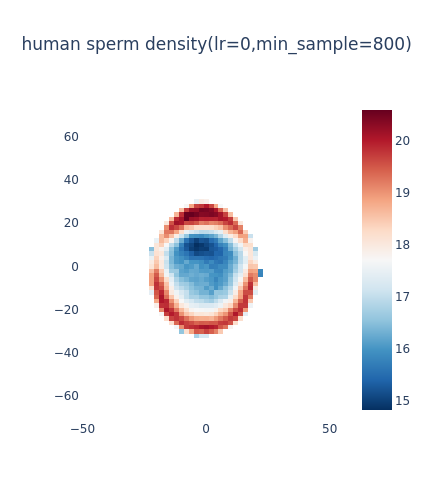

In [46]:
fig = ss_pileup_density(dat.loc[0], 800)
fig.update_layout(
    height = 500,
    width = 430,
    title = "human sperm density(lr=0,min_sample=800)",
    plot_bgcolor = "white",
)
fig.show(renderer="png")

In [7]:
clip0 = pd.read_parquet(h.ddir / "Sperm_hg.lr_cs.bfs.pkl" / "__-16__.parquet")

In [9]:
clip0.index.names[0]

'lr'

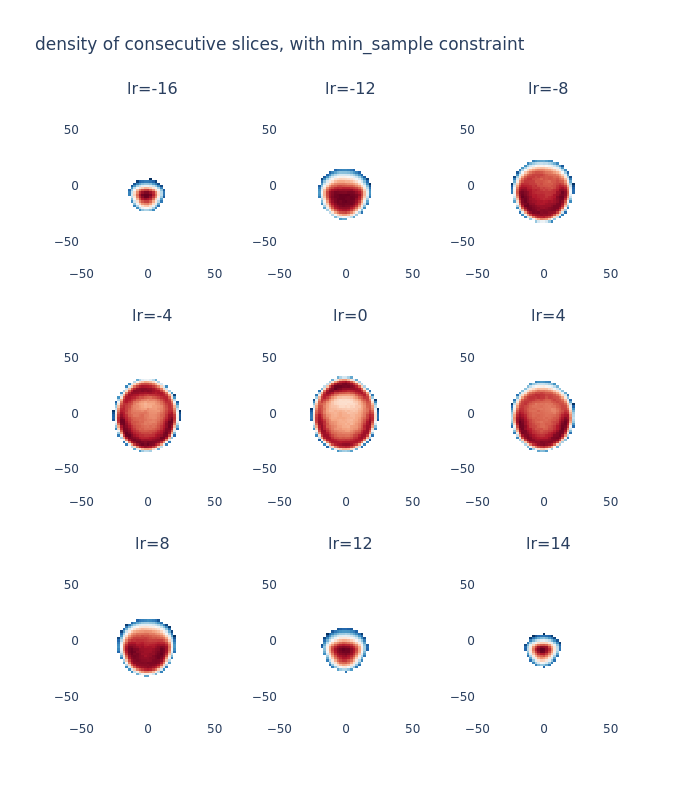

In [3]:
fig = cs_pileup_density(
    h.ddir / "Sperm_hg.lr_cs.bfs.pkl",
    [-16, -12, -8, 
     -4, 0, 4,
     8, 12, 14],
    rows=3,
    cols=3,
    min_samples=800,
    big=True
    )
fig.update_layout(
    title = "density of consecutive slices, with min_sample constraint",
    height = 800,
    width = 700,
    plot_bgcolor = "white"
)
fig.show(renderer="png")

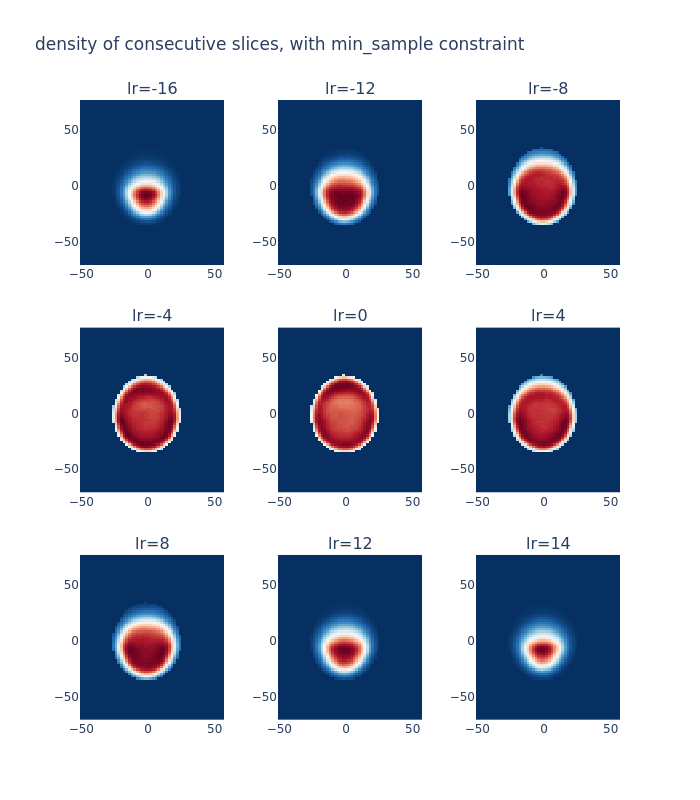

In [4]:
fig = cs_pileup_density(
    h.ddir / "Sperm_hg.lr_cs.bfs.pkl",
    [-16, -12, -8, 
     -4, 0, 4,
     8, 12, 14],
    rows=3,
    cols=3,
    min_samples=0,
    big=True,
    contour = contour,
    fill0=True
    )
fig.update_layout(
    title = "density of consecutive slices, with min_sample constraint",
    height = 800,
    width = 700,
    plot_bgcolor = "white"
)
fig.show(renderer="png")

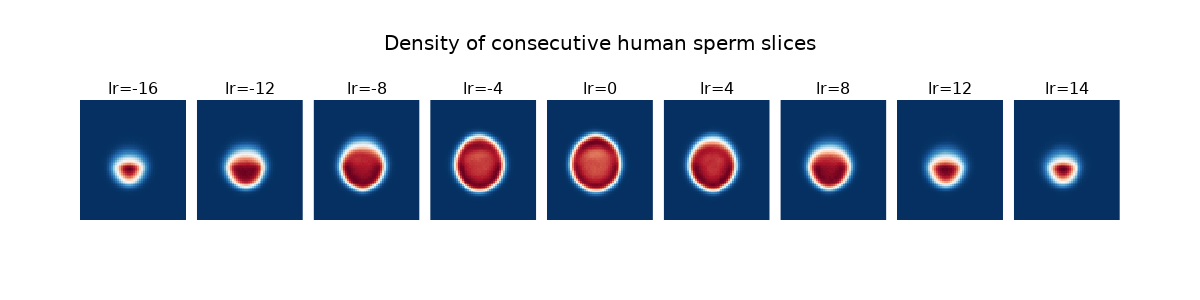

In [4]:
fig = cs_pileup_density(
    #h.ddir / "Sperm_hg.lr_cs.bfs.pkl",
    h.ddir / "Sperm_hg.lr_cs.bfs.h5",
    [-16, -12, -8, 
     -4, 0, 4,
     8, 12, 14],
    rows=1,
    cols=9,
    min_samples=0,
    big=True,
    fill0=True,
    contour=None
    )
fig.update_layout(
    template = h.template,
    title = "Density of consecutive human sperm slices",
    height = 300,
    width = 1200,
    plot_bgcolor = "white"
)
fig.show(renderer="png")

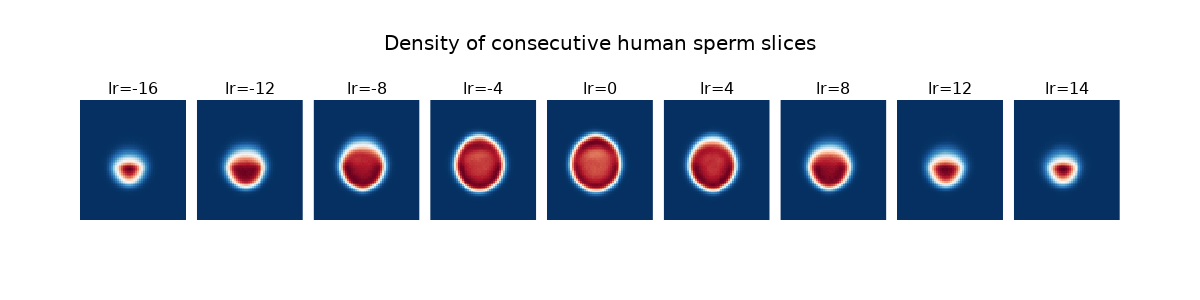

In [3]:
fig = cs_pileup_density(
    #h.ddir / "Sperm_hg.lr_cs.bfs.pkl",
    h.ddir / "Sperm_hg.vx.bfs.h5",
    [-16, -12, -8, 
     -4, 0, 4,
     8, 12, 14],
    rows=1,
    cols=9,
    min_samples=0,
    big=True,
    fill0=True,
    contour=None
    )
fig.update_layout(
    template = h.template,
    title = "Density of consecutive human sperm slices",
    height = 300,
    width = 1200,
    plot_bgcolor = "white"
)
fig.show(renderer="png")